In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
import os
%matplotlib inline

/Users/Iskandar/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)
/Users/Iskandar/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
!pwd


/Users/Iskandar/Desktop/DataSciecneJobHunt/CapitalONe/c1 data science challenge


In [4]:
# Constants to be used ahead

data_path = "user_data" 
ssa_url = 'http://www.ssa.gov/oact/babynames/state/namesbystate.zip'


In [5]:
def download_extract_load(data_path,web_url):
    '''
    Downloads and extracts data and then calls read_in_babynames() function to load the data to a dataframe
    INPUT:
    data_path - path where data needs to be downlaoded. By default works in the current working directory
    web_url - url path to the babynames zipfile
    
    OUTPUT:
    
    data -  data frame with data loaded
    '''
    # creates path if it does not exist
    if not os.path.isdir(data_path): 
        os.makedirs(data_path)
    
    #Change directory to data path
    os.chdir(data_path)
    
    #Download Data if not already downloaded
    if not os.path.isfile("names.zip"):
        print "Downloading."
        import urllib
        urllib.urlretrieve(ssa_url, 'names.zip')
    
    else: print "Data already downloaded."
    print"Downloading complete."    
    
    if not os.path.isfile("AL.txt") or not os.path.isfile("WY.txt"):
        print "Extracting."
        import zipfile
        with zipfile.ZipFile('names.zip') as zf:
            #for member in zf.infolist():#Alternate method
                #zf.extract(member)
            zf.extractall() 
        
    else: print "Data already extracted."
    print"Extraction complete!!"
    
    data = read_in_babynames()
    return data
    

In [6]:
def read_in_babynames():
    """
    Reads in data from a given location
    INPUT:
    None
    
    OUTPUT:
    data- dataframe containing the contents of all the files
    
    """
    
    
    
    # List of all state(+DC = 51 in total) names to be used for reading in the files
    states = ['AL','AK','AZ','AR','CA','CO','CT','DC','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA',
    'ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA',
    'RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
    
    
    # Change working directory to the location of the files
    #os.chdir(path_to_files)
    
    # Initializing an empty dataframe to read in the data
    data = pd.DataFrame()
    counter = 0
    
    for state in states:
        counter+=1
        filename =  state +'.txt'
        #print filename as a check
        print "%d)%s loaded"%(counter,state)
        # The files dont have headers
        temp_data =  pd.read_csv(filename,sep = ",",header=None)
        data = data.append(temp_data)
    
    # Set column names
    data.columns = ["state","gender","year","name","state_frequency"]
    print "Data load is now complete. Do your thing!!"
    return data
    
  

In [7]:
data = download_extract_load(data_path,ssa_url)  


Data already downloaded.
Data already extracted.
Extraction complete!!
1)AL loaded
2)AK loaded
3)AZ loaded
4)AR loaded
5)CA loaded
6)CO loaded
7)CT loaded
8)DC loaded
9)DE loaded
10)FL loaded
11)GA loaded
12)HI loaded
13)ID loaded
14)IL loaded
15)IN loaded
16)IA loaded
17)KS loaded
18)KY loaded
19)LA loaded
20)ME loaded
21)MD loaded
22)MA loaded
23)MI loaded
24)MN loaded
25)MS loaded
26)MO loaded
27)MT loaded
28)NE loaded
29)NV loaded
30)NH loaded
31)NJ loaded
32)NM loaded
33)NY loaded
34)NC loaded
35)ND loaded
36)OH loaded
37)OK loaded
38)OR loaded
39)PA loaded
40)RI loaded
41)SC loaded
42)SD loaded
43)TN loaded
44)TX loaded
45)UT loaded
46)VT loaded
47)VA loaded
48)WA loaded
49)WV loaded
50)WI loaded
51)WY loaded
Data load is now complete. Do your thing!!


In [8]:
data.shape

(5647426, 5)

In [9]:
data.head()

,state,gender,year,name,state_frequency
0,AL,F,1910,Mary,875
1,AL,F,1910,Annie,482
2,AL,F,1910,Willie,257
3,AL,F,1910,Mattie,232
4,AL,F,1910,Ruby,204


### Q1 How have the births rates changed over the last century
### Q2 How have the male and female birthrates changed over the last century


In [330]:
q0 = data.groupby(['year']).sum().reset_index()

In [331]:
q0.head()

,year,state_frequency
0,1910,516318
1,1911,565810
2,1912,887984
3,1913,1028553
4,1914,1293322


In [ ]:

    plt.figure(figsize = (14,10))
    plt.plot(q0['year'], q0['state_frequency'])
    plt.title("Change in birthrates across the US over the last century")
    plt.xlabel("years")
    plt.ylabel("population")
    plt.legend()
    plt.show()

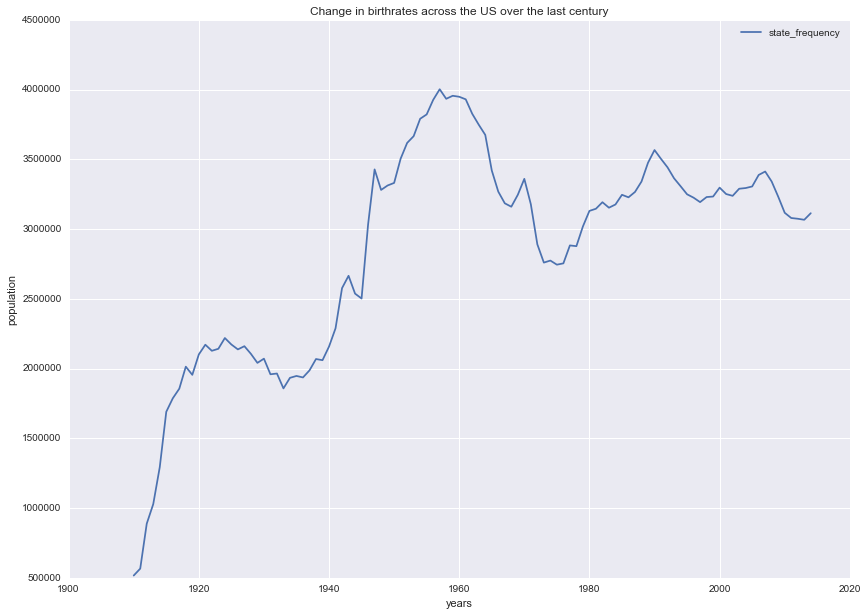

In [333]:
plt.figure(figsize = (14,10))
plt.plot(q0['year'], q0['state_frequency'])
plt.title("Change in birthrates across the US over the last century")
plt.xlabel("years")
plt.ylabel("population")
plt.legend()
plt.show()

In [10]:
q1 = data.groupby(['year','gender']).sum().reset_index()


In [11]:
q1.head()


,year,gender,state_frequency
0,1910,F,352089
1,1910,M,164229
2,1911,F,372371
3,1911,M,193439
4,1912,F,504283


In [12]:
q1.tail()


,year,gender,state_frequency
205,2012,M,1651838
206,2013,F,1419351
207,2013,M,1647092
208,2014,F,1446259
209,2014,M,1667352


In [13]:
mpop = q1[q1['gender']== 'M']
fpop= q1[q1['gender']== 'F']


In [14]:
mpop.head()


,year,gender,state_frequency
1,1910,M,164229
3,1911,M,193439
5,1912,M,383701
7,1913,M,461603
9,1914,M,596436


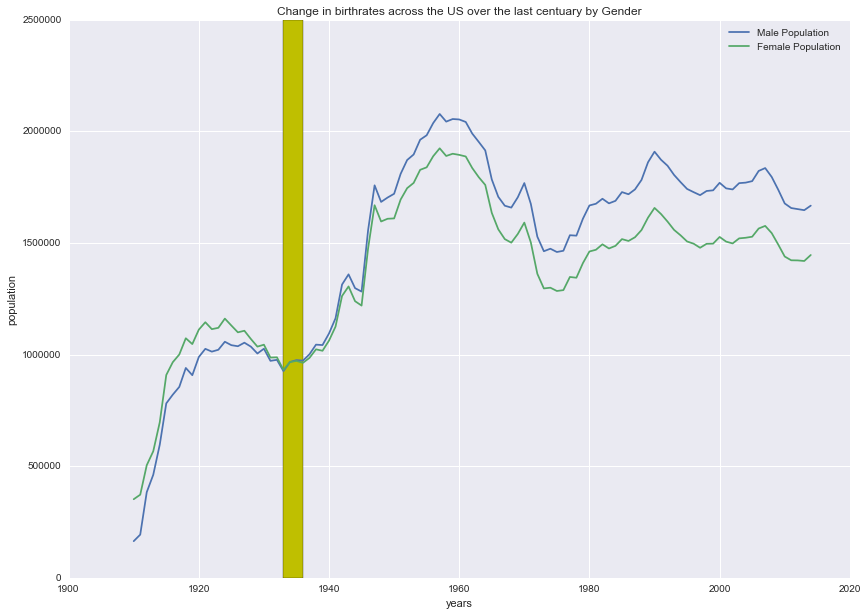

In [350]:
plt.figure(figsize = (14,10))
plt.plot(mpop['year'], mpop['state_frequency'], label = "Male Population")
plt.plot(mpop['year'], fpop['state_frequency'], label = "Female Population")
plt.title("Change in birthrates across the US over the last centuary by Gender")
plt.axvspan(1933,1936 , facecolor = 'y')
plt.xlabel("years")
plt.ylabel("population")
plt.legend()
plt.show()


This is interesting. We immediately notice a few things to begin with:
1. Both male and female birth rates seem to to follow the same pattern.
2. Until late 1930's female birth rates exceeded the male birthrates. The male birthrate has been higher since
3. While ideally we would expect to see an overall rise in the total population , there are 2 peak and troughs in the total population. 


This brings us to a subquestion
##### 1b How have the world events involving US shaped the population rates?


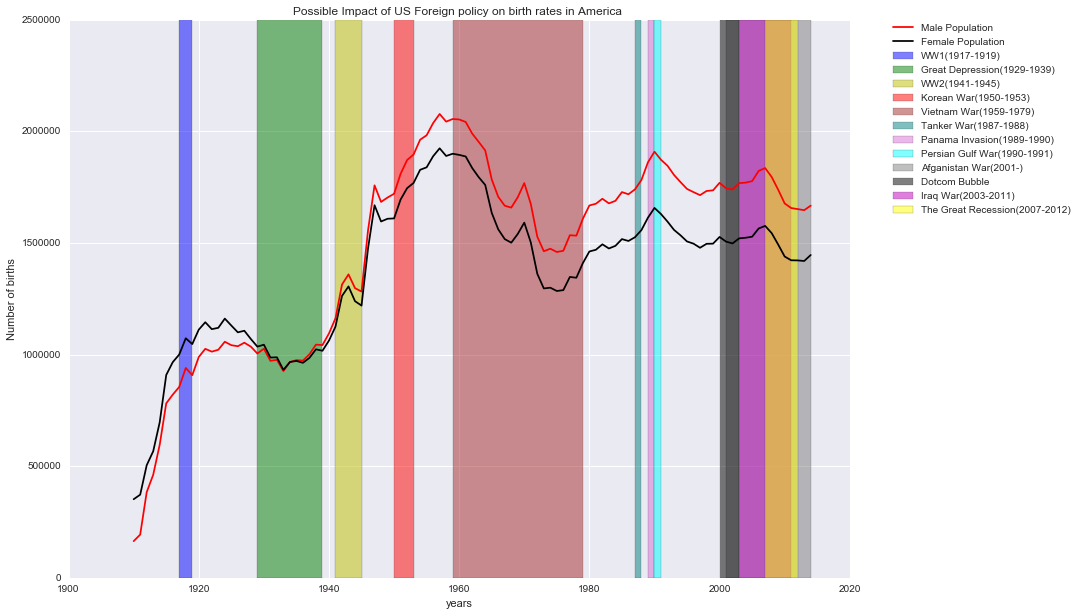

In [354]:
plt.figure(figsize = (14,10))
plt.plot(mpop['year'], mpop['state_frequency'], label = "Male Population", c ="red")
plt.plot(mpop['year'], fpop['state_frequency'], label = "Female Population", c ="black")
plt.title("Possible Impact of US Foreign policy on birth rates in America ")
plt.xlabel("years")
plt.ylabel("Number of births")

plt.axvspan(1917, 1919, facecolor='b', alpha=0.5, label ="WW1(1917-1919)")
plt.axvspan(1929, 1939, facecolor='g', alpha=0.5, label ="Great Depression(1929-1939)")
plt.axvspan(1941, 1945, facecolor='y', alpha=0.5, label ="WW2(1941-1945)")
plt.axvspan(1950, 1953, facecolor='r', alpha=0.5, label ="Korean War(1950-1953)")
plt.axvspan(1959, 1979, facecolor='brown', alpha=0.5, label ="Vietnam War(1959-1979)")
plt.axvspan(1987, 1988, facecolor='teal', alpha=0.5, label ="Tanker War(1987-1988)")
plt.axvspan(1989, 1990, facecolor='orchid', alpha=0.5, label ="Panama Invasion(1989-1990)")
plt.axvspan(1990, 1991, facecolor='cyan', alpha=0.5, label ="Persian Gulf War(1990-1991)")
#plt.axvspan(1997, 1999, facecolor='lime', alpha=0.5, label ="Global market crash(1997-1999)")
plt.axvspan(2001, 2014, facecolor='gray', alpha=0.5, label ="Afganistan War(2001-)")
plt.axvspan(2000, 2003, facecolor='black', alpha=0.5, label ="Dotcom Bubble")
plt.axvspan(2003, 2011, facecolor='m', alpha=0.5, label ="Iraq War(2003-2011)")

plt.axvspan(2007, 2012, facecolor='yellow', alpha=0.5, label ="The Great Recession(2007-2012)")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#plt.legend()
plt.show()

We can see that almost all the troughs in the birth rates can be explained by US participation in wars where 
American troops were mobilized to different countries or economic crisis. 
In fact the two biggest birth rate drops coincide with Great Depression and Vietname war. The drop in recent years can be attributed to an interaction affect between Housing market Recessiona and Wars in Afganistan and Iraq .

Ofcourse since the names with a frequency of less than 5 in a given state are missing from the dataset , resulting data set is distorted and hence we should not make any generalizations from the data

List of wars was derived 
from : https://en.wikipedia.org/wiki/List_of_the_lengths_of_American_participation_in_major_wars

The above claims can be verified from this excerpt from the times magzine:
The U.S. birth rate slid by 8% in recent years, reaching 63.2 births per 1,000 women of childbearing age in 2011, 
according to a report from the Pew Research Center. That is half the peak birth rate recorded in 1957,
which was smack in the middle of the baby boom. This is the lowest rate since at least 1920, the earliest year
for which there are reliable numbers.

http://business.time.com/2012/12/04/birth-rate-plunges-during-recession/

# Which letter has the maximum occurances of names

In [ ]:
Preparing the data for the above question with 


In [17]:
data.head()


,state,gender,year,name,state_frequency
0,AL,F,1910,Mary,875
1,AL,F,1910,Annie,482
2,AL,F,1910,Willie,257
3,AL,F,1910,Mattie,232
4,AL,F,1910,Ruby,204


In [355]:
# Creating a column with the first letter 
data['fletter'] = map(lambda x: x[0],data['name'])
        

In [23]:
data.head()


,state,gender,year,name,state_frequency,fletter
0,AL,F,1910,Mary,875,M
1,AL,F,1910,Annie,482,A
2,AL,F,1910,Willie,257,W
3,AL,F,1910,Mattie,232,M
4,AL,F,1910,Ruby,204,R


In [357]:
# Finding the total frequecies by given letters and plotting
letter = data.groupby(['fletter']).sum().reset_index().drop('year',1)
letter.sort_values("state_frequency",ascending = False)


,fletter,state_frequency
9,J,40437220
12,M,28267690
0,A,23817686
2,C,22045102
3,D,21527509
17,R,21201679
18,S,18515377
11,L,15508025
1,B,14598936
10,K,14367357


[]

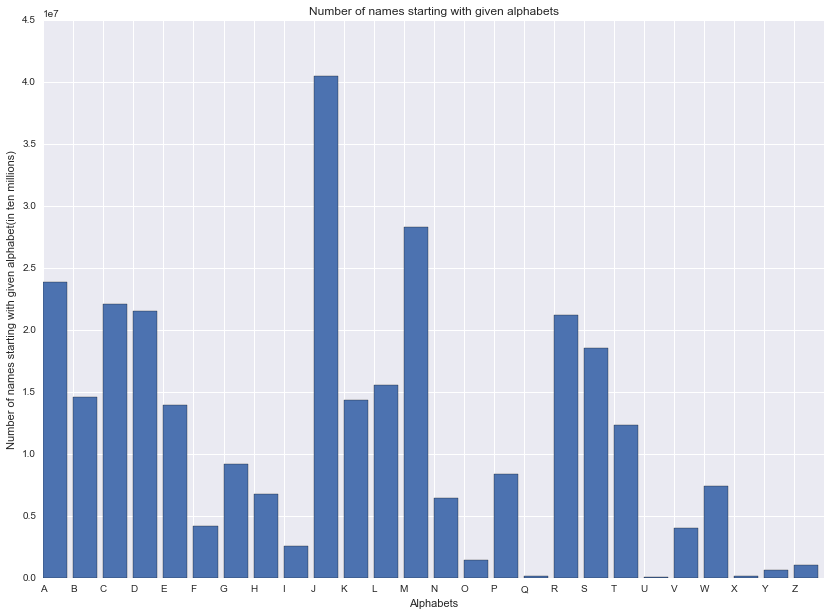

In [230]:
plt.figure(figsize = (14,10))
plt.bar(letter.index,letter.iloc[:,1])
plt.xticks(range(26),letter.iloc[:,0],ha='center', rotation=0)
plt.xlim((0,26))
plt.title("Number of names starting with given alphabets")
plt.xlabel("Alphabets")
plt.ylabel("Number of names starting with given alphabet(in ten millions)")
plt.plot()


In [141]:
#What are the 5 most popular letters
top_5_letters = list(letter.sort_values('state_frequency',ascending= False)[:5]['fletter'])
top_5_letters


['J', 'M', 'A', 'C', 'D']

It seems overtime J is the most popular alphabet which is understandable as we can see that James and John and Joseph were amongst the 10 most popular names .

M is the second most popular with two entires in the top 10. Suprisingly A, the third most popular does not have any entries in top 10. Lets see if it makes top 20


### Breaking down the top alphabets above by Gender

In [378]:
letter = data.groupby(['gender','fletter']).sum().reset_index().drop('year',1)
letter.sort_values(['gender',"state_frequency"],ascending = False)
for gen in ['M',"F"]:
    if gen == "M":
        males = letter[letter['gender'] == gen].reset_index(drop = True)
        print males[:5]
    else:
        females = letter[letter['gender'] == gen].reset_index(drop = True)
        print females[:5]

  gender fletter  state_frequency
0      M       A         10073054
1      M       B          7140823
2      M       C         11245004
3      M       D         13068742
4      M       E          6116761
  gender fletter  state_frequency
0      F       A         13744632
1      F       B          7458113
2      F       C         10800098
3      F       D          8458767
4      F       E          7828823


In [379]:
males

,gender,fletter,state_frequency
0,M,A,10073054
1,M,B,7140823
2,M,C,11245004
3,M,D,13068742
4,M,E,6116761
5,M,F,2591575
6,M,G,5866561
7,M,H,3243232
8,M,I,1091769
9,M,J,27239116


[]

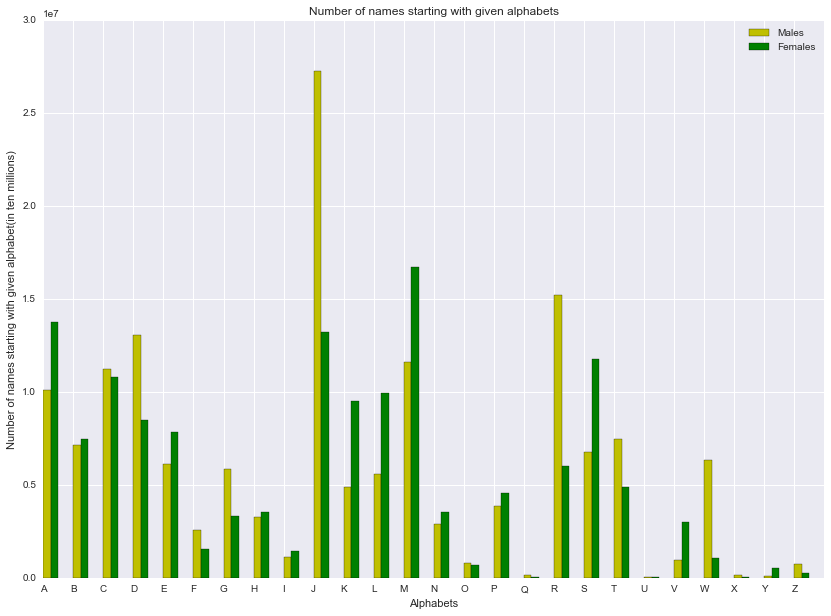

In [391]:
plt.figure(figsize = (14,10))
width =.25
plt.bar(males.index,males.iloc[:,2],width,label = "Males", facecolor='y')

plt.bar(females.index+width,females.iloc[:,2],width, facecolor = "g", label = "Females")
plt.xticks(range(26),males.iloc[:,1],ha='center', rotation=0)
plt.xlim((0,26))
plt.title("Number of names starting with given alphabets")
plt.xlabel("Alphabets")
plt.ylabel("Number of names starting with given alphabet(in ten millions)")
plt.legend()
plt.plot()


### Decade wise analysis of top alphabets

bins = range(1900,2030, 10)
labels = ["1900's","1910's","1920's","1930's","1940's","1950's","1960's","1970's","1980's","1990's","2000's","2010's"]
data['decade'] = pd.cut(data['year'],bins,labels=labels)


In [236]:
temp = data.groupby(['decade','fletter']).sum().reset_index().drop('year',1)
temp.head()


,decade,fletter,state_frequency
0,1900's,A,39761.0
1,1900's,B,17969.0
2,1900's,C,27894.0
3,1900's,D,16429.0
4,1900's,E,53108.0


In [244]:
let_by_dec = pd.DataFrame()
for label in labels:
    df = temp[(temp['decade']==label)]
    print df.sort_values('state_frequency',ascending = False)[:1]
    let_by_dec = let_by_dec.append(df.sort_values('state_frequency',ascending = False)[:1])
    

    decade fletter  state_frequency
12  1900's       M          73292.0
    decade fletter  state_frequency
38  1910's       M        1828031.0
    decade fletter  state_frequency
61  1920's       J        2536771.0
    decade fletter  state_frequency
87  1930's       J        2912152.0
     decade fletter  state_frequency
113  1940's       J        4273712.0
     decade fletter  state_frequency
139  1950's       J        4762262.0
     decade fletter  state_frequency
165  1960's       J        4351902.0
     decade fletter  state_frequency
191  1970's       J        4704473.0
     decade fletter  state_frequency
217  1980's       J        5275207.0
     decade fletter  state_frequency
243  1990's       J        4474796.0
     decade fletter  state_frequency
260  2000's       A        4522901.0
     decade fletter  state_frequency
286  2010's       A        1744206.0


In [245]:
let_by_dec


,decade,fletter,state_frequency
12,1900's,M,73292.0
38,1910's,M,1828031.0
61,1920's,J,2536771.0
87,1930's,J,2912152.0
113,1940's,J,4273712.0
139,1950's,J,4762262.0
165,1960's,J,4351902.0
191,1970's,J,4704473.0
217,1980's,J,5275207.0
243,1990's,J,4474796.0


###  Decadewise analysis of top alphabet by gender

In [270]:
data.head()


,state,gender,year,name,state_frequency,fletter,decade
0,AL,F,1910,Mary,875,M,1900's
1,AL,F,1910,Annie,482,A,1900's
2,AL,F,1910,Willie,257,W,1900's
3,AL,F,1910,Mattie,232,M,1900's
4,AL,F,1910,Ruby,204,R,1900's


In [247]:
temp = data.groupby(['decade','fletter','gender']).sum().reset_index().drop('year',1)


In [248]:
gender = ['M','F']
male = pd.DataFrame()
female =pd.DataFrame()
for label in labels:
    df = temp[(temp['decade']==label)]
    for gen in gender:
        df1 = df[(df['gender']==gen)]
        df1.sort_values(['state_frequency'],ascending = False, inplace = True)
        print df1[:1]
        if gen  == 'M':
             male =  male.append(df1[:1])
        else:
            female = female.append(df1[:1])
            

    decade fletter gender  state_frequency
19  1900's       J      M          33297.0
    decade fletter gender  state_frequency
24  1900's       M      F          68125.0
    decade fletter gender  state_frequency
71  1910's       J      M        1181949.0
    decade fletter gender  state_frequency
76  1910's       M      F        1558562.0
     decade fletter gender  state_frequency
123  1920's       J      M        1758079.0
     decade fletter gender  state_frequency
128  1920's       M      F        1950936.0
     decade fletter gender  state_frequency
175  1930's       J      M        1775252.0
     decade fletter gender  state_frequency
180  1930's       M      F        1490142.0
     decade fletter gender  state_frequency
227  1940's       J      M        2593735.0
     decade fletter gender  state_frequency
226  1940's       J      F        1679977.0
     decade fletter gender  state_frequency
279  1950's       J      M        3016566.0
     decade fletter gender  state_freque

/Users/Iskandar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [404]:
# Top Alphabets for each decade for boys
male


,decade,fletter,gender,state_frequency
19,1900's,J,M,33297.0
71,1910's,J,M,1181949.0
123,1920's,J,M,1758079.0
175,1930's,J,M,1775252.0
227,1940's,J,M,2593735.0
279,1950's,J,M,3016566.0
331,1960's,J,M,2917030.0
383,1970's,J,M,3129035.0
435,1980's,J,M,3556293.0
487,1990's,J,M,3201163.0


In [405]:
# Top Alphabets for each decade for girls
female


,decade,fletter,gender,state_frequency
24,1900's,M,F,68125.0
76,1910's,M,F,1558562.0
128,1920's,M,F,1950936.0
180,1930's,M,F,1490142.0
226,1940's,J,F,1679977.0
266,1950's,D,F,2116753.0
348,1960's,S,F,1646430.0
382,1970's,J,F,1575438.0
416,1980's,A,F,2237703.0
468,1990's,A,F,2284410.0


### Number of unique names for males starting with letter J


In [409]:
test_m = data[(data['fletter'] == 'J') & (data['gender'] == 'M')].groupby(["decade",'name']).sum().reset_index()
test_m.head()

,decade,name,year,state_frequency
0,1900's,Ja,NaN,NaN
1,1900's,Jaasiel,NaN,NaN
2,1900's,Jaaziel,NaN,NaN
3,1900's,Jabar,NaN,NaN
4,1900's,Jabari,NaN,NaN


The above Nulls are expected as all Names may not exist for every decade

In [412]:
# The count function by default ignores the Nulls
test_m1 = test_m.groupby(['decade']).count().reset_index()
test_m1.head()


,decade,name,year,state_frequency
0,1900's,1215,45,45
1,1910's,1215,113,113
2,1920's,1215,131,131
3,1930's,1215,131,131
4,1940's,1215,145,145


In [414]:
no_of_unique_j_names =  test_m1.loc[:, ['decade','state_frequency']]
no_of_unique_j_names


,decade,state_frequency
0,1900's,45
1,1910's,113
2,1920's,131
3,1930's,131
4,1940's,145
5,1950's,145
6,1960's,183
7,1970's,318
8,1980's,523
9,1990's,706


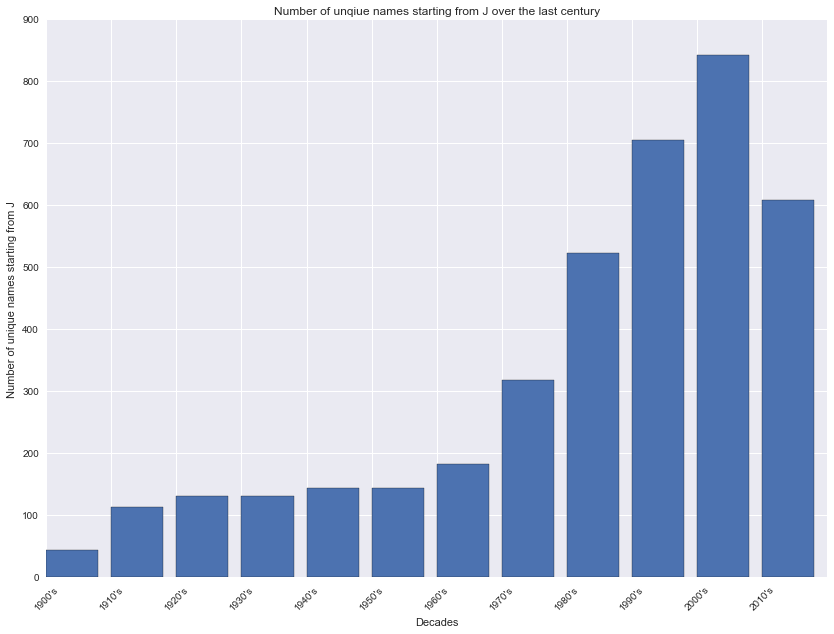

In [406]:
plt.figure(figsize = (14,10))
plt.bar(range(12),test_m1.state_frequency)
plt.xticks(range(12),test_m1.decade,rotation =45)
plt.xlabel('Decades')
plt.ylabel('Number of unique names starting from J')
plt.title("Number of unqiue names starting from J over the last century")
plt.show()

It seems while J is the most common alphabet the number of unique names are definitely increasing


# References
http://nbviewer.jupyter.org/github/Prooffreader/Baby_names_US_IPython/blob/master/download_and_process.ipynb


# Appendix -Techinques/Analysis performed and discarded

In [328]:
# Perform decadewise unique name analysis for dominant letter of each decade for females



def no_uniq(data,labels,dom_letter,gender = 'F'):
    data_f  = data[data['gender']== 'F']
    print data_f.head()
    d = pd.DataFrame()
    for label in labels:
        print label
        dom_letter = list(female[female['decade']==label]['fletter'])[0]
        print list(dom_letter)[0]    
        data_f1 = data_f[(data_f['fletter']== dom_letter) & (data_f['decade']==label)]
        data_f1 = data_f1.groupby(['fletter']).count().reset_index()

        d =d.append(data_f1) 
        print d
    #     data_f1.fillna(0,inplace =True)
    #     #print data_f1.head()
    #     test_m1 = data_f1.groupby(['decade']).count().reset_index()
    #     print test_m1
    #plt.bar(range(12),test_m1.state_frequency)
    #plt.xticks(range(12),test_m1.decade,rotation =45)
    

  state gender  year    name  state_frequency fletter  decade
0    AL      F  1910    Mary              875       M  1900's
1    AL      F  1910   Annie              482       A  1900's
2    AL      F  1910  Willie              257       W  1900's
3    AL      F  1910  Mattie              232       M  1900's
4    AL      F  1910    Ruby              204       R  1900's
1900's
M
  fletter  state  gender  year  name  state_frequency  decade
0       M   1220    1220  1220  1220             1220    1220
1910's
M
  fletter  state  gender   year   name  state_frequency  decade
0       M   1220    1220   1220   1220             1220    1220
0       M  18868   18868  18868  18868            18868   18868
1920's
M
  fletter  state  gender   year   name  state_frequency  decade
0       M   1220    1220   1220   1220             1220    1220
0       M  18868   18868  18868  18868            18868   18868
0       M  21857   21857  21857  21857            21857   21857
1930's
M
  fletter  state  ge

In [ ]:
# 

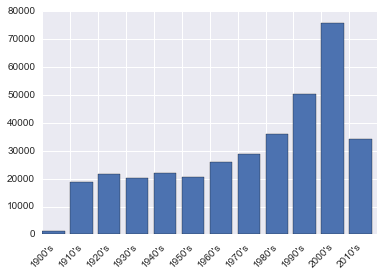

In [400]:
plt.bar(range(d.shape[0]),d['state_frequency'])
plt.xticks(range(d.shape[0]),female['decade'],rotation =45)
plt.show()

### Analysis of top 5 letter and their occurance in top 50 names

In [253]:
data.head()


,state,gender,year,name,state_frequency,fletter,decade
0,AL,F,1910,Mary,875,M,1900's
1,AL,F,1910,Annie,482,A,1900's
2,AL,F,1910,Willie,257,W,1900's
3,AL,F,1910,Mattie,232,M,1900's
4,AL,F,1910,Ruby,204,R,1900's


In [89]:
# List of 10 most popular names of all time
(data.groupby(['gender','name']).sum().sort_values(by = ["state_frequency"],ascending = False))[:10]


year  state_frequency
gender name                              
M      James    10504600          4938965
       John     10506510          4829733
       Robert   10496851          4710600
       Michael   9932640          4295779
       William  10506510          3829026
F      Mary     10430202          3730856
M      David    10447162          3554102
       Richard  10427952          2529952
       Joseph   10489225          2479602
       Charles  10491166          2244617

This is extremely surprising as we can see that not a single name starting with A makes the top 20 but it still rates 
3rd in the list of most names starting from a letter

In [98]:
#Lets do further analysis on A
# List of 10 most popular names of all time
(data.groupby(['gender','name']).sum().sort_values(by = ["state_frequency"],ascending = False))[20:50]


year  state_frequency
gender name                               
M      Anthony    9916143          1393328
       Paul      10370498          1355826
       Mark       9387147          1339737
       George    10308531          1319624
       Steven     8499929          1270565
       Kenneth   10287567          1260299
       Andrew    10173181          1237410
       Edward    10313322          1211244
       Joshua     5973528          1171438
       Brian      7631527          1156708
       Kevin      7168228          1152052
F      Margaret  10254692          1121985
       Susan      8604529          1108255
M      Ronald     9417283          1073777
       Timothy    8624550          1057094
F      Dorothy    8436309          1051603
       Jessica    6165611          1038060
M      Jason      6502205          1011594
F      Sarah     10022801          1010829
       Betty      7678790           983933
       Nancy      9130027           983736
       Karen      7599899           982011
M      Jeffrey    7328564           969108
F      Lisa       6145658           962000
M      Ryan       5632864           898879
       Gary       8032235           896510
F      Helen      9132192           895615
M      Nicholas   8250281           872721
F      Sandra     7622824           870515
M      Jacob      8134152           864857

In [159]:
def topn_names(n , data):
    topn = data.groupby(['gender','name']).sum().sort_values(by = ["state_frequency"],\
                                                          ascending = False)[:n].\
                                                            reset_index().drop(['gender','year','state_frequency'],1)
    return topn

topn50 = topn_names(50, data)
topn100 = topn_names(100, data)

In [161]:
topn50['fletter'] = map(lambda x:x[0],topn50['name'])
topn100['fletter'] = map(lambda x:x[0],topn100['name'])
topn.head()

,name,fletter
0,James,J
1,John,J
2,Robert,R
3,Michael,M
4,William,W


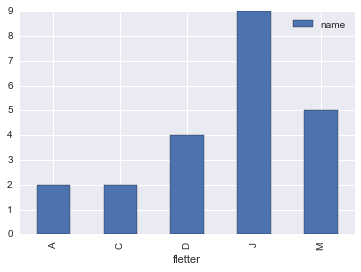

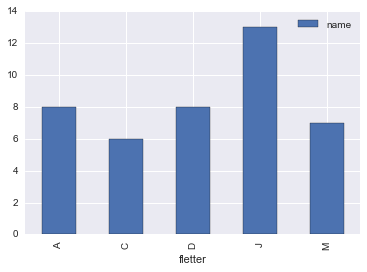

In [163]:
topn50[topn50['fletter'].isin(top_5_letters)].groupby('fletter').count().plot(kind ="bar", label = '50')
topn100[topn100['fletter'].isin(top_5_letters)].groupby('fletter').count().plot(kind ="bar", label = '100')




In [169]:
#out of the above letter how many total unique names by those letters

data_unique = data[data['fletter'].isin(top_5_letters)]

In [170]:
data_unique

,state,gender,year,name,state_frequency,fletter
0,AL,F,1910,Mary,875,M
1,AL,F,1910,Annie,482,A
3,AL,F,1910,Mattie,232,M
11,AL,F,1910,Minnie,139,M
16,AL,F,1910,Carrie,122,C
18,AL,F,1910,Martha,113,M
20,AL,F,1910,Alice,112,A
22,AL,F,1910,Jessie,108,J
24,AL,F,1910,Margaret,106,M
26,AL,F,1910,Marie,104,M


In [ ]:
#Lets see the change by decade for each

In [164]:
data.head()

,state,gender,year,name,state_frequency,fletter
0,AL,F,1910,Mary,875,M
1,AL,F,1910,Annie,482,A
2,AL,F,1910,Willie,257,W
3,AL,F,1910,Mattie,232,M
4,AL,F,1910,Ruby,204,R


In [186]:
data.drop(['cats'],1)

,state,gender,year,name,state_frequency,fletter,decade
0,AL,F,1910,Mary,875,M,1900's
1,AL,F,1910,Annie,482,A,1900's
2,AL,F,1910,Willie,257,W,1900's
3,AL,F,1910,Mattie,232,M,1900's
4,AL,F,1910,Ruby,204,R,1900's
5,AL,F,1910,Ethel,197,E,1900's
6,AL,F,1910,Lillie,187,L,1900's
7,AL,F,1910,Ruth,168,R,1900's
8,AL,F,1910,Bessie,162,B,1900's
9,AL,F,1910,Elizabeth,146,E,1900's


In [195]:
temp = data.groupby(['decade','fletter']).sum().reset_index().drop('year',1)

In [246]:
for label in labels:
    df = temp[temp['decade']==label]
    df.sort_values('state_frequency',ascending = False, inplace = True)
    print df[:1]

    decade fletter  state_frequency
12  1900's       M          73292.0
    decade fletter  state_frequency
38  1910's       M        1828031.0
    decade fletter  state_frequency
61  1920's       J        2536771.0
    decade fletter  state_frequency
87  1930's       J        2912152.0
     decade fletter  state_frequency
113  1940's       J        4273712.0
     decade fletter  state_frequency
139  1950's       J        4762262.0
     decade fletter  state_frequency
165  1960's       J        4351902.0
     decade fletter  state_frequency
191  1970's       J        4704473.0
     decade fletter  state_frequency
217  1980's       J        5275207.0
     decade fletter  state_frequency
243  1990's       J        4474796.0
     decade fletter  state_frequency
260  2000's       A        4522901.0
     decade fletter  state_frequency
286  2010's       A        1744206.0


/Users/Iskandar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [ ]:
plt.plot()

Lets break it down by gender for each decade and check
        

In [208]:

d = data.groupby(['decade','fletter','gender']).sum().reset_index().drop('year',1)
